# Régression Logistique

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/logistic-regression.ipynb)

La régression logistique est une technique de modélisation statistique essentielle pour la modélisation de la classification binaire, utilisée dans des domaines tels que la médecine, la finance et la science des données pour prendre des décisions basées sur des probabilités.

Contrairement à la régression linéaire qui prédit des valeurs continues, la régression logistique prédit la probabilité qu'une observation appartienne à une catégorie particulière (généralement 0 ou 1). Elle fonctionne en ajustant une fonction logistique aux données d'entraînement. La fonction logistique transforme une combinaison linéaire des caractéristiques (variables indépendantes) en une valeur comprise entre 0 et 1, représentant la probabilité d'appartenance à la catégorie 1. Plus précisément, elle utilise la fonction sigmoïd:

$$P(Y=1) = \cfrac{1}{1 + e^{-z}}$$

où $P(Y=1)$ est la probabilité que $Y$ soit égal à $1$, $e$ est la base du logarithme naturel, et $z$ est la combinaison linéaire des caractéristiques, soit $z = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n$, où $X_1, X_2, ..., X_n$ sont les variables indépendantes, et $b_0, b_1, b_2, ..., b_n$ sont les coefficients à estimer. Ces coefficients déterminent la contribution de chaque variable indépendante à la prédiction de la variable dépendante.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/Logistic_regression)

In [6]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend
# !pip3 install -q -U scikit-learn

## Données

Création d'un jeu de données synthétiques:

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

# Créer les données
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=.9,
    random_state=random_state,
)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Vérifier les dimensions (division 80%-20%)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

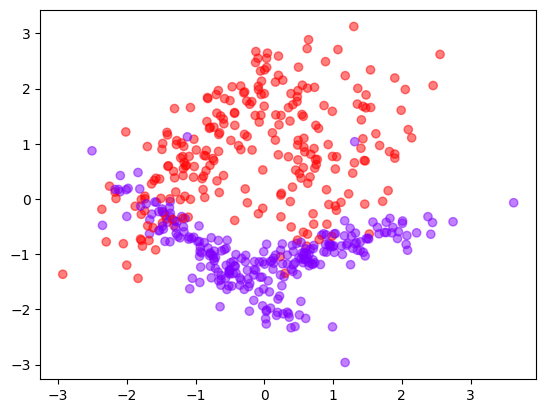

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap=plt.cm.rainbow)

## Régression Logistique avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 0.89
Test accuracy: 0.87


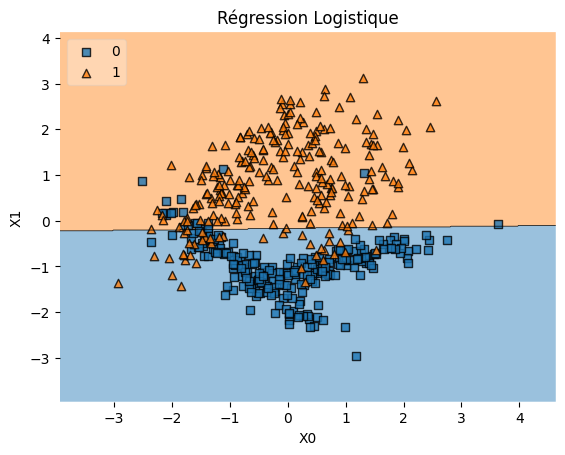

In [10]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Régression Logistique')
plt.show()